****Pittsburgh Neighborhood Watch: Crime Rate****

Pittsburgh, overall, has a great reputation as quite a lively and livable city. From the striking downtown, cozy and comfortable Shadyside and academic Oakland, there is something for everybody to enjoy in the city, and everyone will have their own opinions on what makes a neighborhood great. However, we asked, based on a heuristic and objective formula, which Pittsburgh neighborhood reigns supreme in livability? 

In [7]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plot
import mapclassify

crime = "../datasets/crime/allmergedtables.xlsx"

crimeplace = gpd.read_file(crime)
print(10)
print(crimeplace['Neighborhood'].unique())
crimeplace.groupby('Neighborhood').count()




10
['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' None 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'N/A' 'Terrace Village' 'West Oakland'
 'Fineview' 'Upper Lawrenceville' 'Sheraden' 'Spring Hill–City View'
 'Bloomfield' 'Beechview' 'Squirrel Hill North' 'Perry South' 'Garfield'
 'Banksville' 'Bluff' 'Bon Air' 'Northview Heights' 'Overbrook' 'Larimer'
 'Hazelwood' 'Friendship' 'Central Northside' 'Homewood West'
 'Lower Lawrenceville' 'East Carnegie' 'Bedford Dwellings'
 'Lincoln-Lemington-Belmar' 'New Homestead' 'Troy Hill' 'Highland 

,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Block_Address
Neighborhood,,,,,,,,,,,,,,,,,,
Allegheny Center,390,390,390,390,390,390,390,390,389,389,389,389,390,390,390,390,390,383
Allegheny West,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,89
Allentown,857,857,857,857,857,857,854,854,852,852,852,852,856,857,857,857,857,851
Arlington,224,224,224,224,224,224,223,223,223,223,223,223,224,224,224,224,224,222
Arlington Heights,76,76,76,76,76,76,76,76,75,75,75,75,76,76,76,76,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,173
West End,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,150
West Oakland,201,201,201,201,201,201,200,200,200,200,200,200,201,201,201,201,201,198


That's a lot of data, and there's not much we can do with it yet... let's try looking at it as a bar graph!

<Axes: xlabel='Neighborhood'>

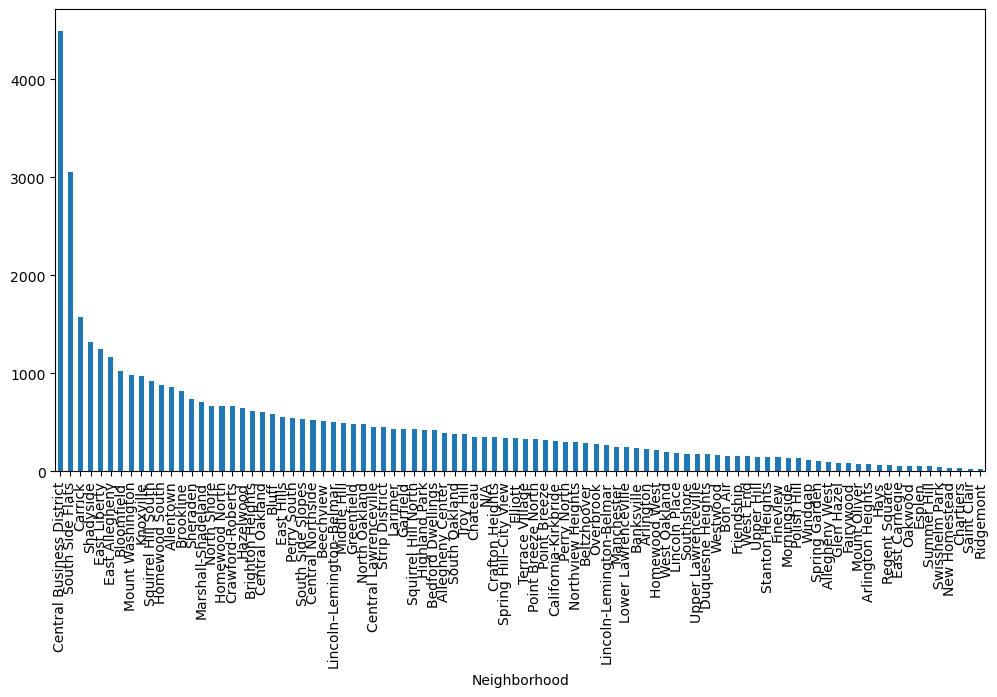

In [5]:

counts = crimeplace["Neighborhood"].value_counts()

counts.plot(kind='bar', figsize=(12, 6))

Wow, that doesn't clear much up. We see that there are a lot more citations in neighborhoods with higher populations, but that's usually a given, and more raw citations is not really representative of a dangerous neighborhood. Shadyside ranks 4th, yet I'm not really fighting for my life on the way to Coffee Tree Roasters, right? So how can we change this up to make it more fair?

Here's an idea: let's get the populations of these neighborhoods and find an actual crime rate instead of just a raw number!

Let's start by importing a new data set:

In [15]:
import pandas as pd

a = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
a.head(3)
print(10)

10
